In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# VERİLERİ İÇERİ AKTARALIM

In [2]:
veri = pd.read_csv("universite_siralamasi_20220204.csv")
veri.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


# VERİ HAKKINDA BİLGİ

In [3]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

# SÜTUN İSİMLERİNİ DEĞİŞTİRELİM

In [4]:
veri.rename(columns={"world_rank"             : "dünya_sıralaması",
                     "university_name"        : "üniversite_adı",
                     "country"                : "ülke",
                     "teaching"               : "öğretim",
                     "international"          : "uluslararası",
                     "research"               : "araştırma",
                     "citations"              : "alıntı",
                     "income"                 : "gelir",
                     "total_score"            : "toplam_puan",
                     "num_students"           : "öğrenci_sayısı",
                     "student_staff_ratio"    : "öğrenci_çalışan_oranı",
                     "international_students" : "uluslararası_öğrenci",
                     "female_male_ratio"      : "kadın_erkek_oranı",
                     "year"                   : "yıl"}, inplace=True)
veri.head(5)

,dünya_sıralaması,üniversite_adı,ülke,öğretim,uluslararası,araştırma,alıntı,gelir,toplam_puan,öğrenci_sayısı,öğrenci_çalışan_oranı,uluslararası_öğrenci,kadın_erkek_oranı,yıl
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [5]:
veri = veri.drop("dünya_sıralaması", axis=1)
veri.head()

,üniversite_adı,ülke,öğretim,uluslararası,araştırma,alıntı,gelir,toplam_puan,öğrenci_sayısı,öğrenci_çalışan_oranı,uluslararası_öğrenci,kadın_erkek_oranı,yıl
0,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


# KAYIP VERİLERİ DOLDURMA

In [6]:
veri.isnull().sum() # Gördüğümüz üzere eksik veriler var ve bunları doldurmaya çalışalım

üniversite_adı             0
ülke                       0
öğretim                    0
uluslararası               0
araştırma                  0
alıntı                     0
gelir                      0
toplam_puan                0
öğrenci_sayısı            59
öğrenci_çalışan_oranı     59
uluslararası_öğrenci      67
kadın_erkek_oranı        233
yıl                        0
dtype: int64

In [7]:
# Kayıp verilerin(öğrenci_sayısı ve uluslararası_öğrenci) tipini str'den float'a çevirme

sayac = 0
for i in veri["öğrenci_sayısı"]:
    if type(i) != float:
        veri["öğrenci_sayısı"][sayac] = float(i.replace(',','.'))
        sayac = sayac + 1
    else:
       sayac = sayac + 1       

sayac = 0             
for i in veri["uluslararası_öğrenci"]:
    if type(i) != float:
        veri["uluslararası_öğrenci"][sayac] = float(i.replace('%','.'))
        sayac = sayac + 1
    else:
        sayac = sayac + 1


        
print(type(veri["öğrenci_sayısı"][2602]))  
print(type(veri["uluslararası_öğrenci"][2600]))

<class 'float'>
<class 'float'>


In [8]:
# öğrenci_çalışan_oranı kayıp veri doldurma
ogrenci_calisan_orani_mean = np.mean(veri.öğrenci_çalışan_oranı)
print("Öğrenci-Çalışan Oranı Ortalaması: {}" .format(ogrenci_calisan_orani_mean))
veri["öğrenci_çalışan_oranı"] = veri["öğrenci_çalışan_oranı"].fillna(ogrenci_calisan_orani_mean)
print(veri.info())

Öğrenci-Çalışan Oranı Ortalaması: 18.445283018867975
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   üniversite_adı         2603 non-null   object 
 1   ülke                   2603 non-null   object 
 2   öğretim                2603 non-null   float64
 3   uluslararası           2603 non-null   object 
 4   araştırma              2603 non-null   float64
 5   alıntı                 2603 non-null   float64
 6   gelir                  2603 non-null   object 
 7   toplam_puan            2603 non-null   object 
 8   öğrenci_sayısı         2544 non-null   object 
 9   öğrenci_çalışan_oranı  2603 non-null   float64
 10  uluslararası_öğrenci   2536 non-null   object 
 11  kadın_erkek_oranı      2370 non-null   object 
 12  yıl                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 264.5+

In [9]:
# ögrenci_sayısı kayıp veri doldurma
ogrenci_sayisi_mean = np.mean(veri.öğrenci_sayısı)
print("Öğrenci Sayısı Ortalaması: {}" .format(ogrenci_sayisi_mean))
veri["öğrenci_sayısı"] = veri["öğrenci_sayısı"].fillna(ogrenci_sayisi_mean)
print(veri.info())

Öğrenci Sayısı Ortalaması: 24.538580581761007
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   üniversite_adı         2603 non-null   object 
 1   ülke                   2603 non-null   object 
 2   öğretim                2603 non-null   float64
 3   uluslararası           2603 non-null   object 
 4   araştırma              2603 non-null   float64
 5   alıntı                 2603 non-null   float64
 6   gelir                  2603 non-null   object 
 7   toplam_puan            2603 non-null   object 
 8   öğrenci_sayısı         2603 non-null   float64
 9   öğrenci_çalışan_oranı  2603 non-null   float64
 10  uluslararası_öğrenci   2536 non-null   object 
 11  kadın_erkek_oranı      2370 non-null   object 
 12  yıl                    2603 non-null   int64  
dtypes: float64(5), int64(1), object(7)
memory usage: 264.5+ KB
Non

In [10]:
# uluslarası_öğrenci kayıp veri doldurma

uluslarasi_ogrenci_mean = np.mean(veri.uluslararası_öğrenci)
print("Uluslararası Öğrenci Yüzde Ortalaması: {}" .format(uluslarasi_ogrenci_mean))
veri["uluslararası_öğrenci"] = veri["uluslararası_öğrenci"].fillna(uluslarasi_ogrenci_mean)
print(veri.info())

Uluslararası Öğrenci Yüzde Ortalaması: 15.444006309148264
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   üniversite_adı         2603 non-null   object 
 1   ülke                   2603 non-null   object 
 2   öğretim                2603 non-null   float64
 3   uluslararası           2603 non-null   object 
 4   araştırma              2603 non-null   float64
 5   alıntı                 2603 non-null   float64
 6   gelir                  2603 non-null   object 
 7   toplam_puan            2603 non-null   object 
 8   öğrenci_sayısı         2603 non-null   float64
 9   öğrenci_çalışan_oranı  2603 non-null   float64
 10  uluslararası_öğrenci   2603 non-null   float64
 11  kadın_erkek_oranı      2370 non-null   object 
 12  yıl                    2603 non-null   int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 2

In [11]:
# kadın_erkek_oranı kayıp veri silme

kadin_erkek_orani_degiskeni = veri["kadın_erkek_oranı"]
print(pd.isnull(kadin_erkek_orani_degiskeni).sum())

kadin_erkek_orani_filtresi = ~pd.isnull(kadin_erkek_orani_degiskeni)
veri = veri[kadin_erkek_orani_filtresi]
veri.info()
veri.to_csv("universite_siralamasi_temizlenmis.csv", index=False) # Temizlenmiş veriyi kaydediyoruz

233
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 1 to 2602
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   üniversite_adı         2370 non-null   object 
 1   ülke                   2370 non-null   object 
 2   öğretim                2370 non-null   float64
 3   uluslararası           2370 non-null   object 
 4   araştırma              2370 non-null   float64
 5   alıntı                 2370 non-null   float64
 6   gelir                  2370 non-null   object 
 7   toplam_puan            2370 non-null   object 
 8   öğrenci_sayısı         2370 non-null   float64
 9   öğrenci_çalışan_oranı  2370 non-null   float64
 10  uluslararası_öğrenci   2370 non-null   float64
 11  kadın_erkek_oranı      2370 non-null   object 
 12  yıl                    2370 non-null   int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 259.2+ KB


# VERİ ANALİZİ

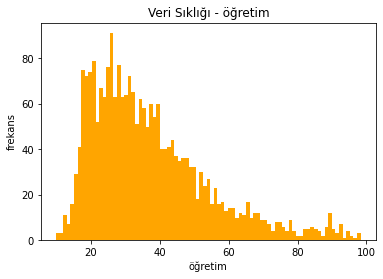

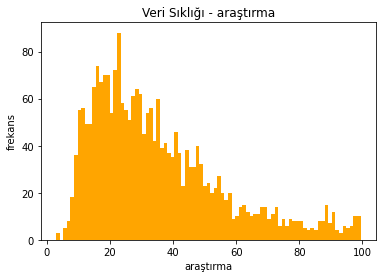

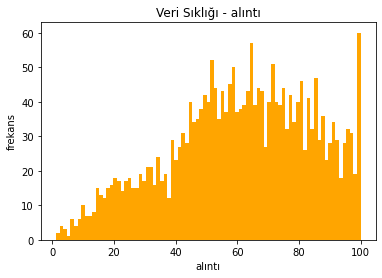

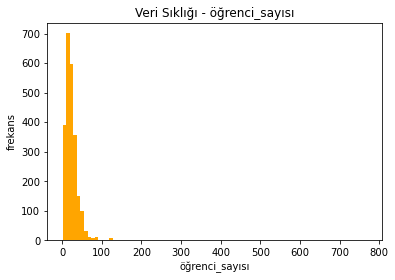

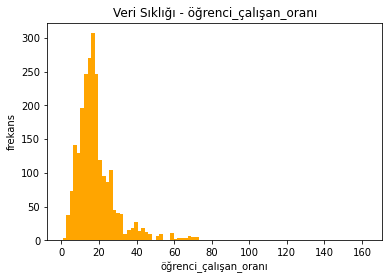

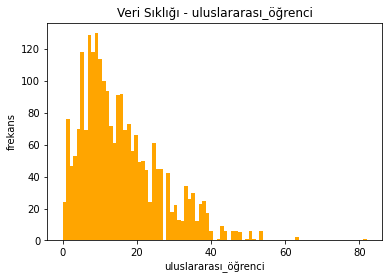

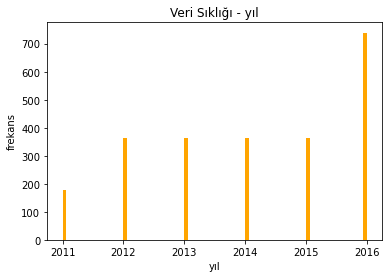

,öğretim,araştırma,alıntı,öğrenci_sayısı,öğrenci_çalışan_oranı,uluslararası_öğrenci,yıl
count,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000
mean,37.118776,35.272996,60.966076,24.504735,18.663376,15.563946,2014.092405
std,17.127079,20.864431,23.078292,26.825228,11.536605,10.727974,1.683326
min,9.900000,2.900000,1.200000,1.211000,0.600000,0.000000,2011.000000
25%,24.500000,19.400000,45.500000,12.537500,12.200000,8.000000,2013.000000
50%,33.100000,30.000000,62.650000,20.584000,16.300000,13.000000,2014.000000
75%,45.675000,46.175000,79.200000,30.333000,21.600000,22.000000,2016.000000
max,98.300000,99.400000,100.000000,769.000000,162.600000,82.000000,2016.000000


In [12]:
# Sayısal Değişkenler(öğretim, araştırma, alıntı, öğrenci_sayısı, öğrenci_çalışan_oranı, uluslararası_öğrenci, yıl)

def plotHistogram(degisken):
    
    plt.figure()
    plt.hist(veri[degisken], bins=85, color="orange") # bins bölünecek aralık sayısı
    plt.xlabel(degisken)
    plt.ylabel("frekans")
    plt.title("Veri Sıklığı - {}" .format(degisken))
    plt.show()
    
sayisalDegiskenler = ["öğretim", "araştırma", "alıntı", "öğrenci_sayısı", "öğrenci_çalışan_oranı", 
                      "uluslararası_öğrenci", "yıl"]   

for i in sayisalDegiskenler:
    plotHistogram(i)
    
verininIstatistikselOzellikleri = veri.describe()
verininIstatistikselOzellikleri

# Multiple Linear Regression